# <center> $\underline{\textbf{AAG02 - Scraping}}$ <p><center> Flávio Motta

## $\textbf{1. Importando Bibliotecas}$

In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

from urllib import request, response, error, parse
from urllib.request import urlopen
from bs4 import BeautifulSoup

## $\textbf{2. Preparando o soup}$

Nessa etapa, selecionei um site de cotação de ações brasileiras.

In [3]:
url = 'https://www.infomoney.com.br/cotacoes/ibovespa/'
html = urlopen(url)
soup = BeautifulSoup(html,'lxml')
title = soup.title.string

## $\textbf{3. Realizando o scraping}$

### 3.1. Busca e tratamento dos dados

<p>Inicialmente foi feita a inspeção da página em si, após isso, identifiquei o id "high" como sendo o id da tabela que contém todas cotações.
<p>Indo contra boas práticas de programação, o site contém dois elementos HTML com mesmo ID, dessa forma tive que determinar que estava buscando uma tabela com id "high".
<p>Logo em seguida o código navega na tabela procurando todas as linhas (tag 'tr'), e após isso, procura todas as tags de âncora (tag 'a'), essas tags âncora contém o nome do ticker da ação que está sendo descrita na linha
<p>Em seguida o código busca todas células td da linha tr, como a primeira linha não contém dados (é uma linha de cabeçalho) a condicional if foi adicionada para verificar se a variável declarada contém valores adicionados.
<p>Caso contenha, significa que é um ticker e que tem valores associados, dessa forma consigo recuperar os dados que desejo trabalhar.
    

In [17]:
cotacoes = soup.find_all('table', id="high")
subidas = np.empty((0,1))
for elemento in cotacoes:
    linha = elemento.find_all('tr')
    for x in linha:
        data = x.find_all('a')
        textoTicker = ''
        textoValor = ''
        for ticker in data:
            textoTicker = ticker.get_text()
        dado = x.find_all('td')
        if len(dado) > 1:
            textoValor = dado[2].get_text()
            subidas = np.append(subidas,float(textoValor))
        print(textoTicker + ' ' +textoValor)

 
ABEV3 0
AZUL4 0.56
B3SA3 3.11
BBAS3 0.99
BBDC3 2.87
BBDC4 2.4
BBSE3 1.98
BPAC11 2.05
BRAP4 1.56
BRDT3 1.65
BRFS3 2.34
BRKM5 6.72
BRML3 0.47
BTOW3 0.6
CCRO3 1.2
CIEL3 2.11
CMIG4 0.89
COGN3 0.13
CRFB3 2.21
CSAN3 2.46
CSNA3 3.84
CYRE3 3.67
ECOR3 2.02
EGIE3 1.05
ELET3 1.31
ELET6 1.26
ENBR3 1.98
ENGI11 0.34
EQTL3 0.12
FLRY3 1.2
GGBR4 1.65
GOAU4 2.07
HAPV3 1.08
HGTX3 0.07
HYPE3 1.21
ITSA4 1.5
ITUB4 1.59
KLBN11 1.99
LAME4 0.69
LREN3 2.06
MGLU3 1.2
MRVE3 2.59
NTCO3 4.16
PCAR3 0.93
PETR3 1.8
PETR4 1.21
QUAL3 2.85
RADL3 0.18
RAIL3 0.3
RENT3 0.11
SANB11 1.65
SBSP3 1.02
SULA11 0.78
SUZB3 0.72
TIMP3 2.14
TOTS3 1.39
UGPA3 4.05
USIM5 3.49
VALE3 1.21
VIVT4 0.95
VVAR3 2.9
WEGE3 0.3
YDUQ3 0.76


Agora tenho um vetor chamado subidas que armazena as porcentagens de subida em um dia, dessa forma consigo plotar usando uma PDF a distribuição das subidas do dia.

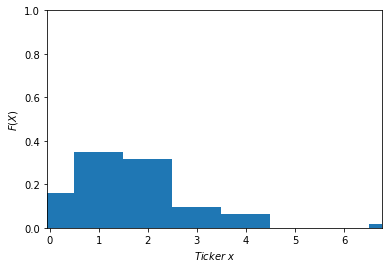

In [23]:
# insiro a amostra num dataframe e ploto a PDF usando o pandas (esse método é o correto: não normaliza amostra)
df_amostra = pd.DataFrame({'':subidas})
ax = df_amostra.plot(kind='hist', density=True, histtype='bar', rwidth=1,
                     xlim=(min(subidas)-0.05, max(subidas)+0.05), ylim=(0,1), 
                     legend=False, bins=np.arange(len(subidas))-0.5)
ax.set_xlabel(r'$Ticker~x$')
ax.set_ylabel(r'$F(X)$')

# configurando xticks e, caso o gráfico comece com x negativo, usando axvline passando pela origem 
lim_min = int(round(min(subidas)))
if lim_min >= 0: 
    lim_min = 0
else:
    ax.axvline(0,color='black',lw=1, linestyle=':')
ax.set_xticks(range(lim_min,int(round(max(subidas)))))